Following this blog
https://www.analyticsvidhya.com/blog/2018/03/introduction-regression-splines-python-codes/

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 

In [9]:
wage = pd.read_csv('data/wage.csv')
wage.head()

,ID,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,231655,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,86582,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,161300,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,155159,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,11443,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


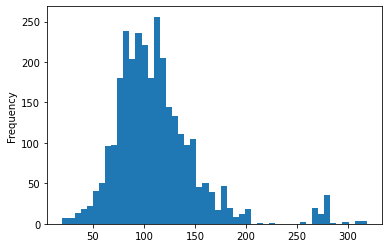

In [11]:
wage.wage.plot.hist(bins=50);

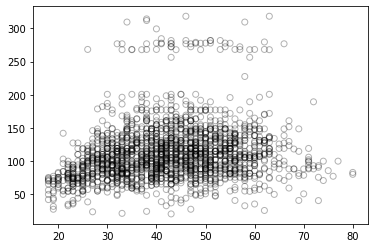

In [12]:
wage_x = wage['age']
wage_y = wage['wage']

# Dividing data into train and validation datasets
train_x, valid_x, train_y, valid_y = train_test_split(wage_x, wage_y, test_size=0.33, random_state = 1)

# Visualize the relationship b/w age and wage
plt.scatter(train_x, train_y, facecolor='None', edgecolor='k', alpha=0.3)


In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
X = np.array(train_x).reshape(-1,1) # an array of 1d arrays
lin_model = LinearRegression()
lin_model.fit(X,train_y)
print(f"X coefficient: { '+'.join([str(i) for i in lin_model.coef_]) }\nIntercept: {lin_model.intercept_}")


X coefficient: 0.7219083108940519
Intercept: 80.65287740759283


In [18]:
valid_x = np.array(valid_x).reshape(-1,1) 
# the -1 just indicates to fill in the other dim. could pass a list/tuple of exact dims as well


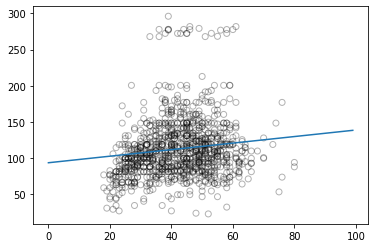

In [29]:
l_space = np.linspace(valid_x.min(),valid_x.max(),100).reshape(-1,1) # reshape to 1 col lots of rows
linear_preds = lin_model.predict(l_space)
# vis
plt.scatter(valid_x,valid_y, facecolor='None', edgecolor='k', alpha=0.3)
plt.plot(linear_preds);

In [35]:
from sklearn.metrics import mean_squared_error
from math import sqrt
MSE = mean_squared_error(valid_x,lin_model.predict(valid_x) )
root_MSE = sqrt(MSE)
print(root_MSE)

68.92019876546516


## Polynomeal Regression

In [36]:
weights = np.polyfit(train_x,train_y, deg=3 )
weights

array([ 6.29073869e-04, -1.36805158e-01,  8.82469303e+00, -5.74157278e+01])

In [50]:
polynomeal_model  = np.poly1d(weights)

In [51]:
polynomeal_preds= polynomeal_model(valid_x)
polynomeal_preds[0:5]

array([[116.94377811],
       [119.98937047],
       [114.62637104],
       [115.9826883 ],
       [ 77.21220105]])

In [60]:
dict(facecolor ='red')

{'facecolor': 'red'}

Text(0.5, 1.0, 'Degree 3 Polynomeal')

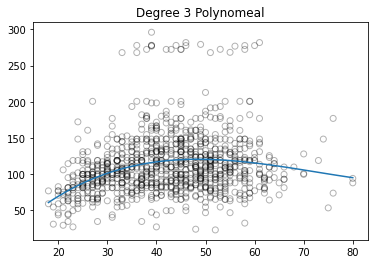

In [71]:
linear_space = np.linspace(valid_x.min(),valid_x.max(),100)
pred_plot = polynomeal_model(linear_space)
plt.scatter(valid_x, valid_y, facecolor='None', edgecolor='k', alpha=0.3)
plt.plot(linear_space, pred_plot)
plt.title("Degree 3 Polynomeal")

In [82]:
df_cuts,bins = pd.cut(train_x,bins=4,retbins=True,right=True) # bins are just the 4 boundaries of the bins
df_cuts.value_counts()


(33.5, 49.0]      941
(49.0, 64.5]      511
(17.938, 33.5]    504
(64.5, 80.0]       54
Name: age, dtype: int64

In [83]:
df_steps = pd.concat([train_x,df_cuts,train_y],axis = 1,keys = ['age','age_cuts','wage'])
df_steps.head()

,age,age_cuts,wage
1382,49,"(33.5, 49.0]",117.146817
23,40,"(33.5, 49.0]",160.642475
2140,55,"(49.0, 64.5]",81.283253
1117,32,"(17.938, 33.5]",94.072715
933,42,"(33.5, 49.0]",75.043154


In [85]:
df_steps_dummies =pd.get_dummies(df_cuts)
df_steps_dummies.head()

,"(17.938, 33.5]","(33.5, 49.0]","(49.0, 64.5]","(64.5, 80.0]"
1382,0,1,0,0
23,0,1,0,0
2140,0,0,1,0
1117,1,0,0,0
933,0,1,0,0


In [86]:
df_steps_dummies.columns = pd.Series(df_steps_dummies.columns,dtype='str').str.replace(', ',' - ').str.replace('\\(|]','',regex = True)
df_steps_dummies.columns


Index(['17.938 - 33.5', '33.5 - 49.0', '49.0 - 64.5', '64.5 - 80.0'], dtype='object')

In [161]:
GLM_fit = sm.GLM(df_steps.wage,df_steps_dummies).fit()

In [198]:
bin_mapping = np.digitize(valid_x, bins) 
X_valid = pd.get_dummies(bin_mapping.flatten())


# X_valid

In [200]:
X_valid = X_valid.drop([5], axis=1)

In [202]:
pred2 = GLM_fit.predict(X_valid)

Text(0, 0.5, 'wage')

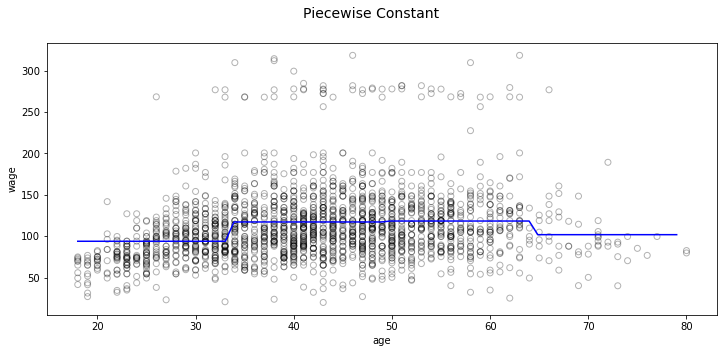

In [206]:
# We will plot the graph for 70 observations only
xp = np.linspace(valid_x.min(),valid_x.max()-1,70) 
bin_mapping = np.digitize(xp, bins) 
X_valid_2 = pd.get_dummies(bin_mapping.flatten()) 
pred2 = GLM_fit.predict(X_valid_2)
fig, (ax1) = plt.subplots(1,1, figsize=(12,5))
fig.suptitle('Piecewise Constant', fontsize=14)

# Scatter plot with polynomial regression line
ax1.scatter(train_x, train_y, facecolor='None', edgecolor='k', alpha=0.3)
ax1.plot(xp, pred2, c='b')

ax1.set_xlabel('age')
ax1.set_ylabel('wage')

In [214]:
from patsy import dmatrix
transformed_x=dmatrix("bs(train, knots=(25,40,60), degree=3, include_intercept=False)",
        {"train": train_x}, # a dict of what the string data is
        return_type='dataframe')


In [216]:
fit1 = sm.GLM(train_y, transformed_x).fit()

In [218]:
transformed_x2 = dmatrix("bs(train, knots=(25,40,50,65),degree =3, include_intercept=False)", {"train": train_x}, return_type='dataframe')
transformed_x2

,Intercept,"bs(train, knots=(25, 40, 50, 65), degree=3, include_intercept=False)[0]","bs(train, knots=(25, 40, 50, 65), degree=3, include_intercept=False)[1]","bs(train, knots=(25, 40, 50, 65), degree=3, include_intercept=False)[2]","bs(train, knots=(25, 40, 50, 65), degree=3, include_intercept=False)[3]","bs(train, knots=(25, 40, 50, 65), degree=3, include_intercept=False)[4]","bs(train, knots=(25, 40, 50, 65), degree=3, include_intercept=False)[5]","bs(train, knots=(25, 40, 50, 65), degree=3, include_intercept=False)[6]"
1382,1.0,0.000000,0.000125,0.272675,0.654300,0.072900,0.000000,0.0
23,1.0,0.000000,0.125000,0.650000,0.225000,0.000000,0.000000,0.0
2140,1.0,0.000000,0.000000,0.066667,0.623611,0.300463,0.009259,0.0
1117,1.0,0.070523,0.503325,0.403285,0.022867,0.000000,0.000000,0.0
933,1.0,0.000000,0.064000,0.610600,0.324600,0.000800,0.000000,0.0
...,...,...,...,...,...,...,...,...
2763,1.0,0.000000,0.027000,0.532800,0.433800,0.006400,0.000000,0.0
905,1.0,0.000000,0.000125,0.272675,0.654300,0.072900,0.000000,0.0
1096,1.0,0.000000,0.000000,0.004267,0.365411,0.531730,0.098593,0.0
235,1.0,0.029752,0.416793,0.504855,0.048600,0.000000,0.000000,0.0


In [219]:
# Fitting Generalised linear model on transformed dataset
fit2 = sm.GLM(train_y, transformed_x2).fit()

# Predictions on both splines
pred1 = fit1.predict(dmatrix("bs(valid, knots=(25,40,60), include_intercept=False)", {"valid": valid_x}, return_type='dataframe'))
pred2 = fit2.predict(dmatrix("bs(valid, knots=(25,40,50,65),degree =3, include_intercept=False)", {"valid": valid_x}, return_type='dataframe'))


TypeError: unsupported operand type(s) for /: 'float' and 'list'

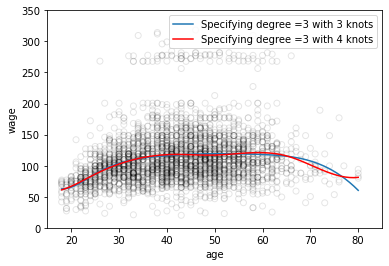

In [228]:
# We will plot the graph for 70 observations only
xp = np.linspace(valid_x.min(),valid_x.max(),70)

# Make some predictions
pred1 = fit1.predict(dmatrix("bs(xp, knots=(25,40,60), include_intercept=False)", {"xp": xp}, return_type='dataframe'))
pred2 = fit2.predict(dmatrix("bs(xp, knots=(25,40,50,65),degree =3, include_intercept=False)", {"xp": xp}, return_type='dataframe'))

# Plot the splines and er
plt.scatter(wage.age, wage.wage, facecolor='None', edgecolor='k', alpha=0.1)
plt.plot(xp, pred1, label='Specifying degree =3 with 3 knots')
plt.plot(xp, pred2, color='r', label='Specifying degree =3 with 4 knots')
plt.legend()
plt.xlim(15,85)
plt.ylim(0,350)
plt.xlabel('age')
plt.ylabel('wage')





In [114]:
class my_int(int):
    def __add__(self,other):
        return (self.real - other.real)
res = my_int(5) + my_int(4)
print(res)

1


-1
